In [1]:
# ===============================
# 1. Import Required Libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score


In [19]:
# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv("Player.csv")

print(df.head())


          Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0     66  ...     30    29      14       A        E     446       33      20   
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   

   Salary  NewLeague  
0     NaN          A  
1   475.0 

In [20]:
# ===============================
# 3. Data Cleaning
# ===============================

# Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Drop rows where Salary is missing
df.dropna(subset=['Salary'], inplace=True)

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['League', 'Division', 'NewLeague'], drop_first=True)

print(df.shape)


(263, 20)


In [21]:
# ===============================
# 4. Feature Selection
# ===============================
X = df.drop('Salary', axis=1)
y = df['Salary']


In [22]:
# ===============================
# 5. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
dt_unpruned = DecisionTreeRegressor(random_state=42)
dt_unpruned.fit(X_train, y_train)

y_pred_unpruned = dt_unpruned.predict(X_test)

print("Unpruned Tree")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_unpruned)))
print("R2 Score:", r2_score(y_test, y_pred_unpruned))


Unpruned Tree
RMSE: 528.1855182411567
R2 Score: -0.5424163096192349


In [24]:
dt_pre_pruned = DecisionTreeRegressor(
    max_depth=4,
    min_samples_leaf=10,
    random_state=42
)

dt_pre_pruned.fit(X_train, y_train)

y_pred_pre = dt_pre_pruned.predict(X_test)

print("\nPre-Pruned Tree")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_pre)))
print("R2 Score:", r2_score(y_test, y_pred_pre))



Pre-Pruned Tree
RMSE: 435.85293424857963
R2 Score: -0.05028842167679892


In [25]:
path = dt_unpruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas


In [31]:
ccp_alphas

array([0.00000000e+00, 5.95238095e-04, 1.26984127e-02, 1.48809524e-02,
       1.48809524e-02, 1.48809524e-02, 1.98412698e-02, 1.98412698e-02,
       3.21428571e-02, 4.13425929e-02, 5.95238095e-02, 5.95238095e-02,
       5.95238095e-02, 5.95238095e-02, 5.95238095e-02, 5.95238095e-02,
       7.93650794e-02, 7.93650794e-02, 7.93650794e-02, 8.92857143e-02,
       1.55555556e-01, 1.65330688e-01, 1.66865079e-01, 2.31428571e-01,
       2.38095238e-01, 2.38095238e-01, 2.38095238e-01, 2.38095238e-01,
       2.38095238e-01, 3.00099206e-01, 3.11111111e-01, 3.17460317e-01,
       3.17460317e-01, 4.23259260e-01, 4.96031746e-01, 5.35714286e-01,
       5.35714286e-01, 5.35714286e-01, 5.43253968e-01, 6.02678571e-01,
       6.34920635e-01, 6.61402117e-01, 6.75169753e-01, 6.85941043e-01,
       6.88095238e-01, 7.14285714e-01, 7.29166667e-01, 7.29166667e-01,
       8.81869489e-01, 9.52380952e-01, 9.52380952e-01, 9.52380952e-01,
       9.72222222e-01, 1.02857143e+00, 1.04049603e+00, 1.07142857e+00,
      

In [32]:
models = []

for alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    dt.fit(X_train, y_train)
    models.append(dt)


In [27]:
train_scores = []
test_scores = []

for model in models:
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))


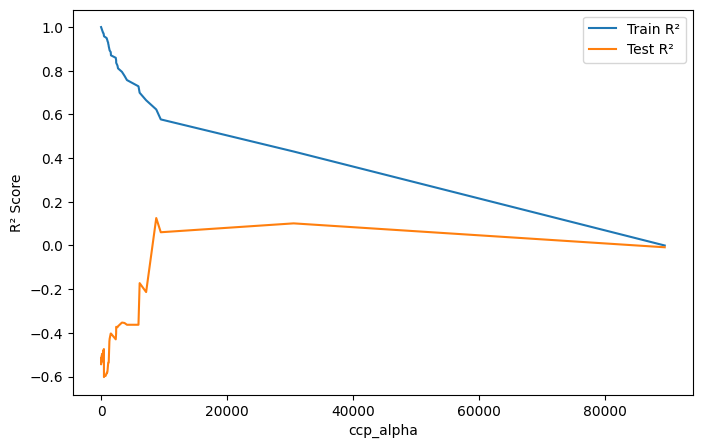

In [28]:
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_scores, label='Train R²')
plt.plot(ccp_alphas, test_scores, label='Test R²')
plt.xlabel("ccp_alpha")
plt.ylabel("R² Score")
plt.legend()
plt.show()


In [29]:
best_alpha = ccp_alphas[np.argmax(test_scores)]

dt_post_pruned = DecisionTreeRegressor(
    random_state=42,
    ccp_alpha=best_alpha
)

dt_post_pruned.fit(X_train, y_train)

y_pred_post = dt_post_pruned.predict(X_test)

print("\nPost-Pruned Tree")
print("Best Alpha:", best_alpha)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_post)))
print("R2 Score:", r2_score(y_test, y_pred_post))



Post-Pruned Tree
Best Alpha: 8758.16687245042
RMSE: 397.65057856490375
R2 Score: 0.1257575970542385


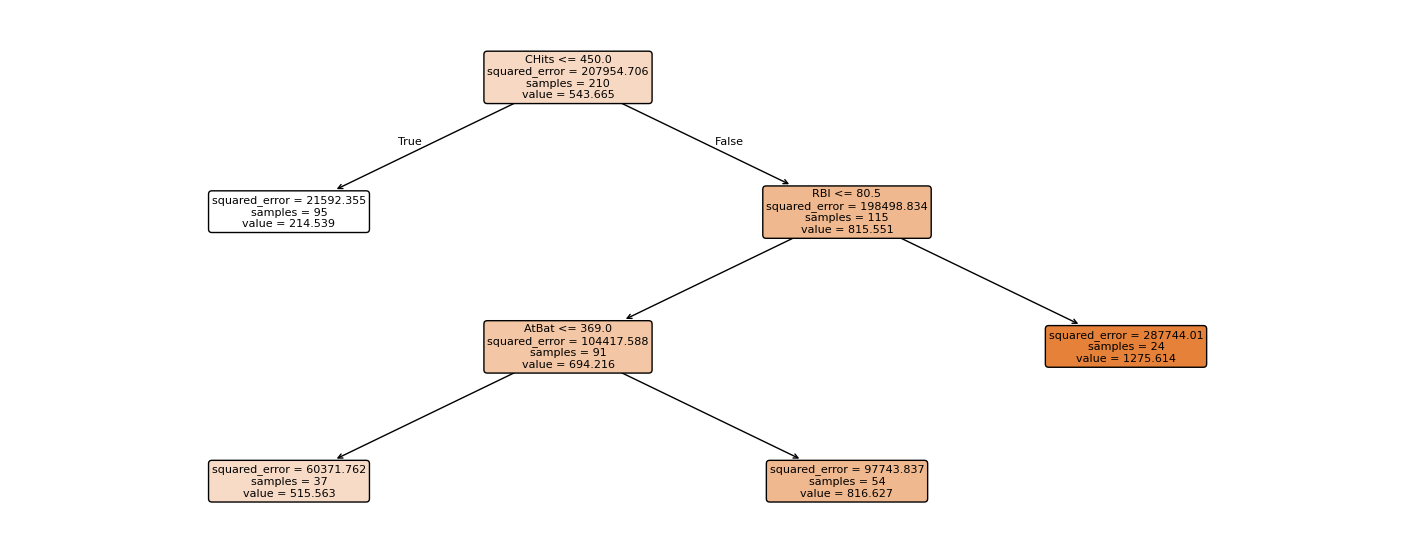

In [30]:
plt.figure(figsize=(18,7))
plot_tree(
    dt_post_pruned,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()
